<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Frequentist-Inference-Case-Study---Part-B" data-toc-modified-id="Frequentist-Inference-Case-Study---Part-B-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Frequentist Inference Case Study - Part B</a></span><ul class="toc-item"><li><span><a href="#Learning-objectives" data-toc-modified-id="Learning-objectives-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Learning objectives</a></span></li><li><span><a href="#Hospital-medical-charges" data-toc-modified-id="Hospital-medical-charges-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Hospital medical charges</a></span></li><li><span><a href="#Learning-outcomes" data-toc-modified-id="Learning-outcomes-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Learning outcomes</a></span></li></ul></li></ul></div>

# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
from scipy.stats import norm

sns.set()
medical = pd.read_csv('insurance2.csv')

In [2]:
print(medical.shape)
medical.head()

(1338, 8)


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [3]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

In [4]:
def std_pop(arr):
    d_of_fd = len(arr) - 1
    mean_est = np.mean(arr)
    var_est = sum((x-mean_est)**2 for x in arr)/d_of_fd
    std_est = np.sqrt(var_est)
    return std_est

In [5]:
charges_mean = np.mean(medical.charges)
charges_std = np.std(medical.charges, ddof=1)
print('The mean of charges is {}.'.format(charges_mean))
print('The standard deviation is {}.'.format(charges_std))

The mean of charges is 13270.422265141257.
The standard deviation is 12110.011236693994.


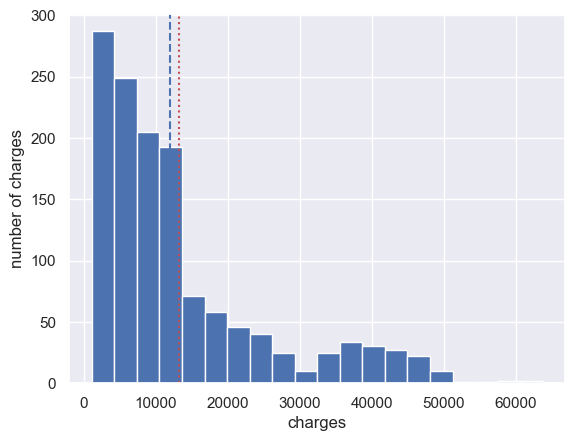

In [6]:
# plot

_ = plt.hist(medical.charges, bins=20)
_ = plt.xlabel('charges')
_ = plt.ylabel('number of charges')
_ = plt.axvline(charges_mean, color='r', linestyle =':')
_ = plt.axvline(12000,color='b', linestyle = '--')
plt.show()

The charges are very non-normally distributed, so we need perform test statistics to estimate population parameters.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Using the Central Limit Theorem (CLT) to perform a sampling distribution & estimate the population parameters;
       The larger the sample size in the simulation, the closer the estimated sampling mean to the mean of population. 
       
 - Use a one-sample t-test, since we do not know the population standard deviation (we only know the sample standard deviation)
 - H0: Actual average charge is >= 12,000
 - Ha: Actual average charge is < 12,000
 - Create a 95% confidence interval (one-tailed) for the ACTUAL average charge, and determine if the lower bound of this confidence interval is > 12,000 or < 12,000.

In [7]:
# randomly sample size = 30 from the observations
samples = np.random.choice(medical.charges, size=30)

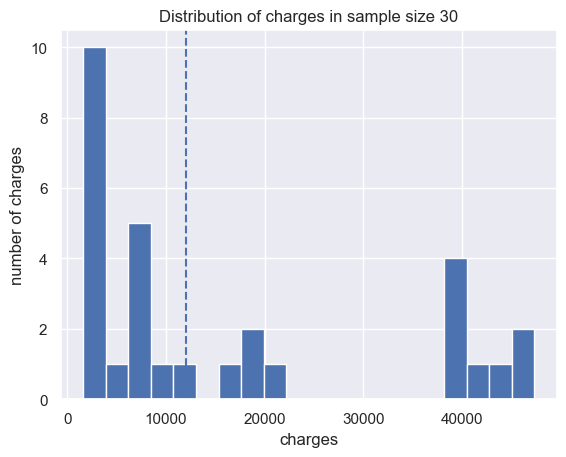

In [8]:

_ = plt.hist(samples, bins=20)
_ = plt.xlabel('charges')
_ = plt.ylabel('number of charges')
_ = plt.title('Distribution of charges in sample size 30')
_ = plt.axvline(12000,color='b', linestyle = '--')
plt.show()

In [9]:
seed(47)
# one sample - sample size =1
def bs_one_sample(data, func):
        bs_sample = np.random.choice(data, len(data))
        return func(bs_sample)
    
bs_one_sample(medical.charges, np.mean)    

13386.798875335577

In [10]:
# sample size = 2000
def bs_reps(data, func, size=1):
    bs_reps = np.empty(size)
    for i in range(size):
        bs_reps[i] = bs_one_sample(data, func)
    return bs_reps

bs_samples_2000 = bs_reps(medical.charges, np.mean, size=2000)

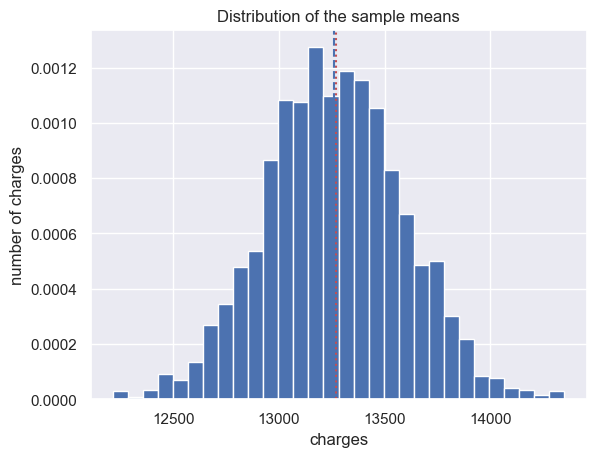

In [11]:
_ = plt.hist(bs_samples_2000,bins=30, density=True)
_ = plt.xlabel('charges')
_ = plt.ylabel('number of charges')
_ = plt.title('Distribution of the sample means')

_ = plt.axvline(np.mean(medical.charges), color='r', linestyle =':')
_ = plt.axvline(np.mean(bs_samples_2000),color='b', linestyle = '--')
_ = plt.show();

In [12]:
# plot ECDF to describe statistic
x = np.sort(np.random.normal(np.mean(bs_samples_2000),np.std(bs_samples_2000), size=10000))
y = 1.0 * np.arange(1, len(x)+1) / len(x)

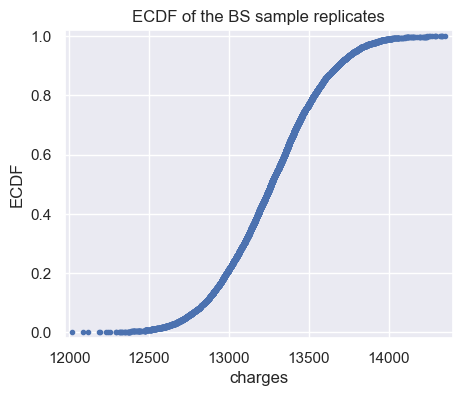

In [13]:
_= plt.figure(figsize = (5, 4))
_= plt.plot(x, y, marker='.', color='b', linestyle = 'none');
_= plt.xlabel('charges')
_= plt.ylabel('ECDF')
_= plt.margins(0.02)
_= plt.title('ECDF of the BS sample replicates')
plt.show();

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__standard error of the sampling distribution of mean is: $\sigma / \sqrt n$

In [14]:
bs_mean = np.mean(bs_samples_2000)
print(bs_mean)
bs_std = np.std(bs_samples_2000)
print(bs_std)

13262.245720747233
325.8487073644487


**  confidence interval gives upper and lower bounds on the range of parameter values you might expect to get if we repeat our measurements. **

In [15]:
# < 12000? one tailed !!!
# critical t value = t.ppf(alpha, loc=0, scale=1, df)  # Percent point function (inverse of cdf — percentiles)
critical_t_value = t.ppf(0.05, df=1337)  # degree of freedom 1338 -1 
print(critical_t_value)

-1.6459941145571324


In [16]:
lower_limit = charges_mean + critical_t_value*charges_std/np.sqrt(1338)
lower_limit

12725.48718381623

A: ** less than 12000 ?? No, the chance seems rare.**

 - The critical t-value is -1.646
 - The 95% confidence interval is (12,725.49,infinite )
 - Since the lower bound of our confidence interval is 12,725.49, the administrator does not need to be concerned about the actual average charge falling below 12,000.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__The null hypotheses would be that people claiming insurance was charged the same as those without claiming insurance. 
The alternative hypotheses would be that people claiming insurance was charged differently from those without claiming insurance. 
For 2 groups tests, the variances of two groups are assumed to be equal. Samples are randomly and independently distributed between groups. degree of freedome = n0 +n1 -2 
H0: u0 =u1
Ha: u0 =/ u1

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [17]:
# two groups: charges for claim insurance 1 & not 0
uninsured = medical.charges[medical.insuranceclaim == 0]
insured = medical.charges[medical.insuranceclaim == 1]

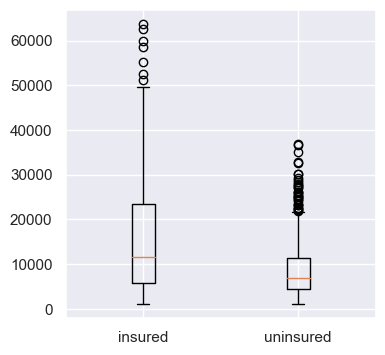

In [18]:
plt.figure(figsize = (4, 4))
plt.boxplot([insured, uninsured], labels = ['insured', 'uninsured'])
plt.show();

In [19]:
x0 = np.mean(uninsured)
n0 = len(uninsured)
var0 = np.var(uninsured,ddof=1)
std0 = np.std(uninsured, ddof=1)

x1 = np.mean(insured)
n1 = len(insured)
var1 = np.var(insured,ddof=1)
std1 = np.std(insured, ddof=1)

print('Sample size of insured is {}, sample size of uninsured is {}'.format(n1, n0))
print('Mean of insured is {}, mean of uninsured is {}'.format(x1, x0))
print('Standard deviation of insured is {}, standard deviation of uninsured is {}'.format(std1, std0))

Sample size of insured is 783, sample size of uninsured is 555
Mean of insured is 16423.928276537663, mean of uninsured is 8821.421892306294
Standard deviation of insured is 14045.928418802127, standard deviation of uninsured is 6446.510126811736


In [20]:
#calculate pooled standard deviation
pooled_std = np.sqrt(((n0-1) * var0 + (n1-1) * var1) / (n0+n1-2))
pooled_std

11520.034268775256

In [21]:
#Calculate standard error of our estimator
std_error = pooled_std * np.sqrt((1/n1)+(1/n0))
std_error

639.2260351391293

In [22]:
# t-value: 
critical_t_value = (x0 -x1)/std_error
critical_t_value

-11.89329903087671

In [23]:
# the significance level (α = 0.05)
alpha = (1 - 0.95)/2 # 0.025   
dof= n0 + n1 - 2 #1336
t_value = -1.96  # found from the table
t.ppf(alpha, 1336)

-1.9617412190546957

In [24]:
#Calculate p-value
p_value = t.sf(abs(critical_t_value), df=1336)*2  # two tailed 
p_value

4.461230231620972e-31

In [25]:
print("pooled_std:", pooled_std)
print("t value:", t_value)
print("p value:", p_value) 

pooled_std: 11520.034268775256
t value: -1.96
p value: 4.461230231620972e-31


In [26]:
# use scipy.stats
from scipy.stats import ttest_ind
ttest, p_value = ttest_ind(insured, uninsured)
print("p_value:", p_value) # 

p_value: 4.461230231620717e-31


In [27]:
if p_value < 0.05:
    print("we fail to reject null hypothesis.")

we fail to reject null hypothesis.


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ the Z test is used when the population follows a normal distribution, the population standard deviation is known, and sample size is above 30.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test